In [117]:
# Imports
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

In [118]:
# Function Definitions
def preprocess_data(df):
    X = df.drop(columns=['y'])
    y = df['y']
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.1, random_state=42)
    return X_train, X_valid, y_train, y_valid

In [119]:
def fit_ann(X_train, y_train):
    model = MLPClassifier(max_iter=1000, random_state=42)
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    mean_accuracy = scores.mean()
    
    # Plot the 5-fold cross-validation scores
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, 6), scores, marker='o', linestyle='-')
    plt.title('5-Fold Cross-Validation Accuracy (ANN)')
    plt.xlabel('Fold')
    plt.ylabel('Accuracy')
    plt.xticks(range(1, 6))
    plt.grid(True)
    plt.show()
    
    print("Mean accuracy over 5 folds (ANN):", mean_accuracy)

    # Fit the model on the entire training set
    model.fit(X_train, y_train)
    return model, mean_accuracy

In [120]:
def fit_decision_tree(X_train, y_train):
    model = DecisionTreeClassifier(random_state=42)
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    mean_accuracy = scores.mean()
    
    # Plot the 5-fold cross-validation scores
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, 6), scores, marker='o', linestyle='-')
    plt.title('5-Fold Cross-Validation Accuracy (Decision Tree)')
    plt.xlabel('Fold')
    plt.ylabel('Accuracy')
    plt.xticks(range(1, 6))
    plt.grid(True)
    plt.show()
    
    print("Mean accuracy over 5 folds (Decision Tree):", mean_accuracy)

    # Fit the model on the entire training set
    model.fit(X_train, y_train)
    return model, mean_accuracy

In [121]:
def evaluate_model(model_tuple, X_valid, y_valid):
    model = model_tuple[0]  # Get the trained model from the tuple
    y_pred = model.predict(X_valid)
    print(classification_report(y_valid, y_pred))

In [122]:
# Load the dataset
df = pd.read_csv("bank-full.csv", delimiter=";")
# Define feature types
numerical_features = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
categorical_features = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']
binary_features = ['default', 'housing', 'loan', 'y']

In [123]:
# pre-processing categorical_features
label_encoder = LabelEncoder()
for column in categorical_features:
    if column in df.columns: 
        df[column] = label_encoder.fit_transform(df[column])

for column in binary_features:
    if column in df.columns:
        df[column] = label_encoder.fit_transform(df[column])

In [124]:
# Split the dataset based on the "marital" feature into three populations: married, single, and divorced
pop_married = df[df['marital'] == 1]
pop_single = df[df['marital'] == 2]
pop_divorced = df[df['marital'] == 0]
pca = PCA(n_components=1)  # Reduce number of features by half

# ANN

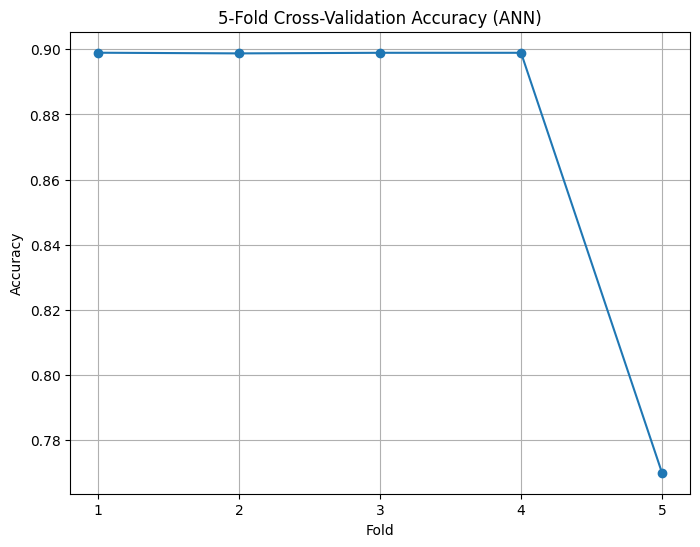

Mean accuracy over 5 folds (ANN): 0.8730993175247388
              precision    recall  f1-score   support

           0       0.91      0.81      0.86      2443
           1       0.15      0.29      0.20       279

    accuracy                           0.76      2722
   macro avg       0.53      0.55      0.53      2722
weighted avg       0.83      0.76      0.79      2722



In [125]:
# Preprocess data for married population and split into train/validation sets
X_train_married, X_valid_married, y_train_married, y_valid_married = train_test_split(pop_married.drop(columns=['y']), pop_married['y'], test_size=0.1, random_state=42)

# Dimensionality Reduction for married population
X_train_married_pca = pca.fit_transform(X_train_married)

# Fit PCA with training data for married population
pca.fit(X_train_married)

# Transform validation data for married population
X_valid_married_pca = pca.transform(X_valid_married)

# Model fitting after dimensionality reduction for married population
ann_married_pca = fit_ann(X_train_married_pca, y_train_married)


# Model evaluation on validation set after dimensionality reduction for married population
evaluate_model(ann_married_pca, X_valid_married_pca, y_valid_married)

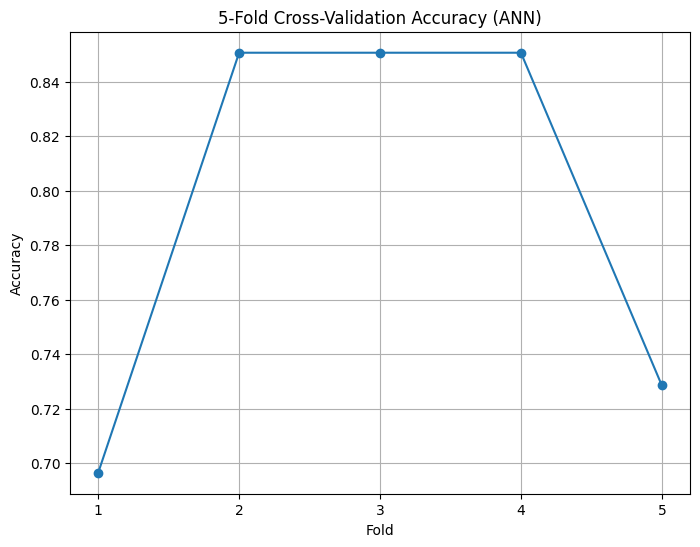

Mean accuracy over 5 folds (ANN): 0.7953347973198559
              precision    recall  f1-score   support

           0       0.87      0.82      0.85      1089
           1       0.22      0.29      0.25       190

    accuracy                           0.74      1279
   macro avg       0.55      0.56      0.55      1279
weighted avg       0.77      0.74      0.76      1279



In [126]:
# Preprocess data for single population and split into train/validation sets
X_train_single, X_valid_single, y_train_single, y_valid_single = preprocess_data(pop_single)

# Dimensionality Reduction for single population
X_train_single_pca = pca.fit_transform(X_train_single)

# Fit PCA with training data for single population
pca.fit(X_train_single)

# Transform validation data for single population
X_valid_single_pca = pca.transform(X_valid_single)

# Model fitting after dimensionality reduction for single population
ann_single_pca = fit_ann(X_train_single_pca, y_train_single)

# Model evaluation on validation set after dimensionality reduction for single population
evaluate_model(ann_single_pca, X_valid_single_pca, y_valid_single)

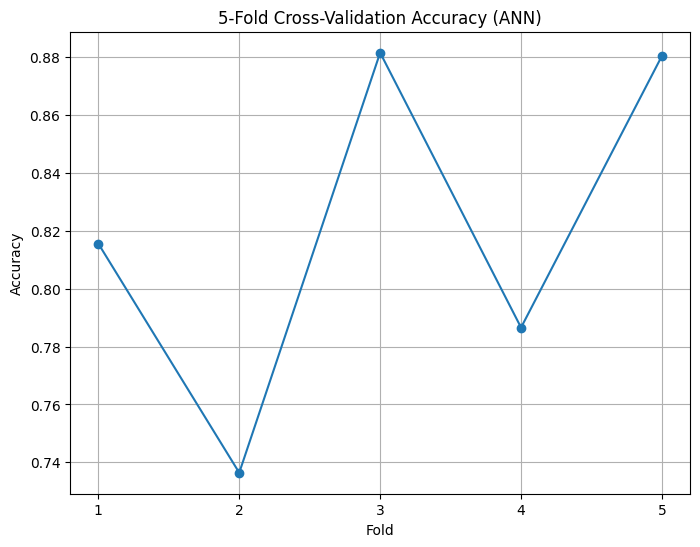

Mean accuracy over 5 folds (ANN): 0.8201034012738564
              precision    recall  f1-score   support

           0       0.88      1.00      0.93       457
           1       0.00      0.00      0.00        64

    accuracy                           0.88       521
   macro avg       0.44      0.50      0.47       521
weighted avg       0.77      0.88      0.82       521



c:\Users\25606\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\25606\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\25606\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [127]:
# Preprocess data for divorced population and split into train/validation sets
X_train_divorced, X_valid_divorced, y_train_divorced, y_valid_divorced = preprocess_data(pop_divorced)

# Dimensionality Reduction for divorced population
X_train_divorced_pca = pca.fit_transform(X_train_divorced)

# Fit PCA with training data for divorced population
pca.fit(X_train_divorced)

# Transform validation data for divorced population
X_valid_divorced_pca = pca.transform(X_valid_divorced)

# Model fitting after dimensionality reduction for divorced population
ann_divorced_pca = fit_ann(X_train_divorced_pca, y_train_divorced)

# Model evaluation on validation set after dimensionality reduction for divorced population
evaluate_model(ann_divorced_pca, X_valid_divorced_pca, y_valid_divorced)

# Decision Tree

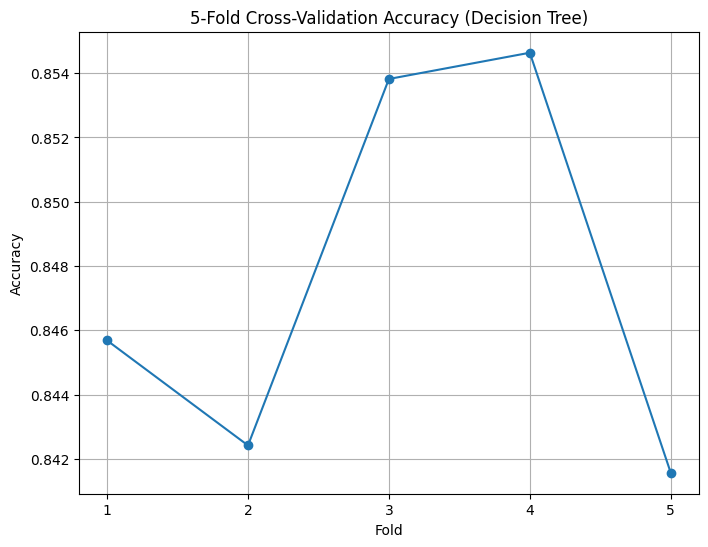

Mean accuracy over 5 folds (Decision Tree): 0.8476240057324554
              precision    recall  f1-score   support

           0       0.91      0.91      0.91      2443
           1       0.21      0.20      0.21       279

    accuracy                           0.84      2722
   macro avg       0.56      0.56      0.56      2722
weighted avg       0.84      0.84      0.84      2722



In [128]:
# Preprocess data for married population and split into train/validation sets
X_train_married, X_valid_married, y_train_married, y_valid_married = preprocess_data(pop_married)

# Dimensionality Reduction for married population
X_train_married_pca = pca.fit_transform(X_train_married)

# Fit PCA with training data for married population
pca.fit(X_train_married)

# Transform validation data for married population
X_valid_married_pca = pca.transform(X_valid_married)

# Model fitting after dimensionality reduction for married population
decision_tree_married_pca = fit_decision_tree(X_train_married_pca, y_train_married)

# Model evaluation on validation set after dimensionality reduction for married population
evaluate_model(decision_tree_married_pca, X_valid_married_pca, y_valid_married)


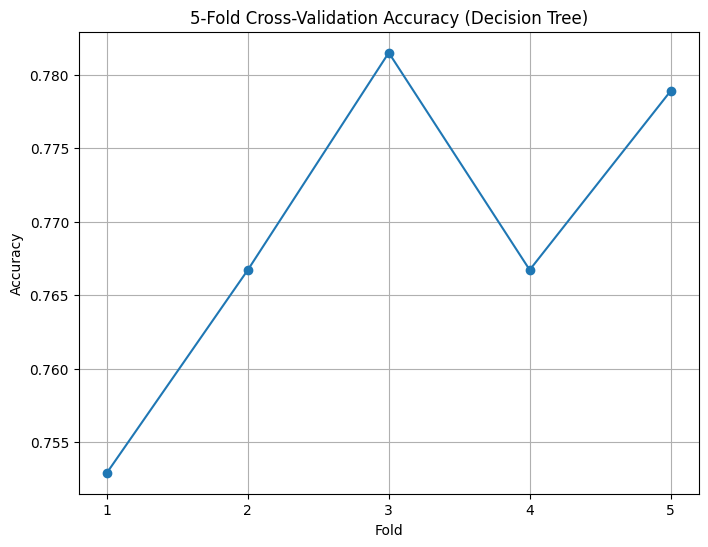

Mean accuracy over 5 folds (Decision Tree): 0.7693524821060279
              precision    recall  f1-score   support

           0       0.86      0.85      0.86      1089
           1       0.19      0.20      0.20       190

    accuracy                           0.76      1279
   macro avg       0.53      0.53      0.53      1279
weighted avg       0.76      0.76      0.76      1279



In [129]:
# Preprocess data for single population and split into train/validation sets
X_train_single, X_valid_single, y_train_single, y_valid_single = preprocess_data(pop_single)

# Dimensionality Reduction for single population
X_train_single_pca = pca.fit_transform(X_train_single)

# Fit PCA with training data for single population
pca.fit(X_train_single)

# Transform validation data for single population
X_valid_single_pca = pca.transform(X_valid_single)

# Model fitting after dimensionality reduction for single population
decision_tree_single_pca = fit_decision_tree(X_train_single_pca, y_train_single)

# Model evaluation on validation set after dimensionality reduction for single population
evaluate_model(decision_tree_single_pca, X_valid_single_pca, y_valid_single)



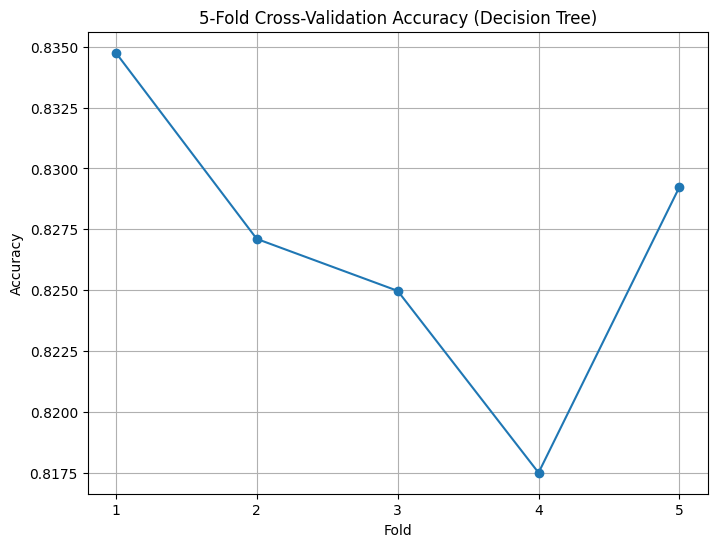

Mean accuracy over 5 folds (Decision Tree): 0.8267161675992654
              precision    recall  f1-score   support

           0       0.90      0.91      0.91       457
           1       0.34      0.31      0.33        64

    accuracy                           0.84       521
   macro avg       0.62      0.61      0.62       521
weighted avg       0.84      0.84      0.84       521



In [130]:
# Preprocess data for divorced population and split into train/validation sets
X_train_divorced, X_valid_divorced, y_train_divorced, y_valid_divorced = preprocess_data(pop_divorced)

# Dimensionality Reduction for divorced population
X_train_divorced_pca = pca.fit_transform(X_train_divorced)

# Fit PCA with training data for divorced population
pca.fit(X_train_divorced)

# Transform validation data for divorced population
X_valid_divorced_pca = pca.transform(X_valid_divorced)

# Model fitting after dimensionality reduction for divorced population
decision_tree_divorced_pca = fit_decision_tree(X_train_divorced_pca, y_train_divorced)

# Model evaluation on validation set after dimensionality reduction for divorced population
evaluate_model(decision_tree_divorced_pca, X_valid_divorced_pca, y_valid_divorced)
